**Project 3 -Image Classifications**

Samantha M. Lord 

Below I will be importing the cifar10

In [1]:
from keras.datasets import cifar10

(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


Training the data below

In [2]:
print("Train features:", train_features.shape)
print("Train labels:", train_labels.shape)
print()
print("Test features:", test_features.shape)
print("Test labels:", test_labels.shape)

Train features: (50000, 32, 32, 3)
Train labels: (50000, 1)

Test features: (10000, 32, 32, 3)
Test labels: (10000, 1)


In [3]:
train_features = train_features.astype("float32") / 255
test_features = test_features.astype("float32") / 255

In [4]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Modeling the data below

In [5]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()


model.compile(
    optimizers.RMSprop(lr=1e-4), loss="categorical_crossentropy", metrics=["accuracy"]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting the data and using Epoch

In [6]:
history = model.fit(
    train_features,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_data=(test_features, test_labels),
)

Epoch 1/10
391/391 [==============================] - 51s 129ms/step - loss: 2.0309 - accuracy: 0.2791 - val_loss: 1.8079 - val_accuracy: 0.3570
Epoch 2/10
391/391 [==============================] - 46s 118ms/step - loss: 1.7387 - accuracy: 0.3752 - val_loss: 1.6748 - val_accuracy: 0.3878
Epoch 3/10
391/391 [==============================] - 47s 121ms/step - loss: 1.6200 - accuracy: 0.4160 - val_loss: 1.6069 - val_accuracy: 0.4190
Epoch 4/10
391/391 [==============================] - 47s 121ms/step - loss: 1.5355 - accuracy: 0.4478 - val_loss: 1.5165 - val_accuracy: 0.4486
Epoch 5/10
391/391 [==============================] - 47s 119ms/step - loss: 1.4769 - accuracy: 0.4694 - val_loss: 1.4925 - val_accuracy: 0.4660
Epoch 6/10
391/391 [==============================] - 46s 119ms/step - loss: 1.4311 - accuracy: 0.4864 - val_loss: 1.4241 - val_accuracy: 0.4834
Epoch 7/10
391/391 [==============================] - 46s 118ms/step - loss: 1.3909 - accuracy: 0.5047 - val_loss: 1.4083 - val_ac

Printing a line chart correlating the training accuracy to the validation accuracy. Along with the training accuracy and validation for loss. 

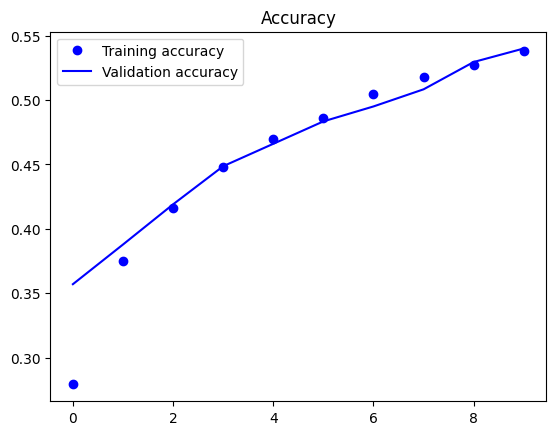

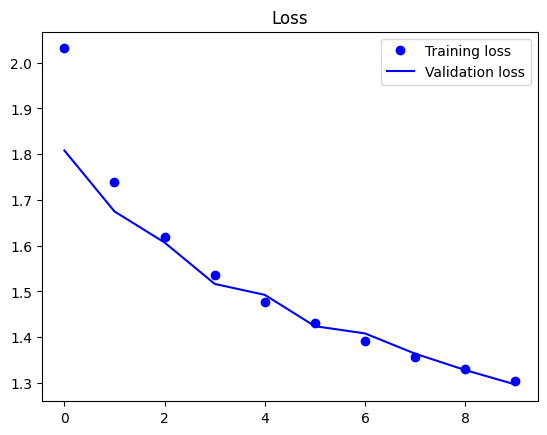

In [7]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Loss")
plt.legend()

plt.show()

Here I will be evaluating the accuracy of the model. 

In [8]:
scoreSeg = model.evaluate(test_features, test_labels)
print("Accuracy: ", scoreSeg[1])

313/313 [==============================] - 4s 11ms/step - loss: 1.2967 - accuracy: 0.5400
Accuracy:  0.5400000214576721


The accuracy for this is 54.00%